# Into

As a graduate student at Hong Kong Baptist University, I embarked on an analysis of Hong Kong's higher education system and its impact on graduates' career trajectories. With eight public universities producing a significant number of talents annually, it is crucial to understand whether these graduates pursue further studies or enter the workforce, and if so, which industries they prefer.


# Import libraries

In [ ]:
import pandas as pd
import requests
import numpy as np

#Visualisation
#MatPlotLib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

#Seaborn
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_colwidth', None)

# Files Connection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
drivePath = '/content/drive'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def download_file_from_github(file_url, file_path):
    response = requests.get(file_url)
    if response.status_code == 200:
        with open(file_path, 'wb') as f:
            f.write(response.content)
        print(f"The file have been downloaded at:{file_path}")
    else:
        print(f"Eerror:{response.status_code}")

# download table-Graduate_Employment_Situation(Eng)
file_url = 'https://raw.githubusercontent.com/Yi-XIE/JustHomework/refs/heads/main/Graduate_Employment_Situation(Eng).csv'
file_path = drivePath + '/MyDrive/Colab Notebooks/data/GES.csv'
download_file_from_github(file_url, file_path)

The file have been downloaded at:/content/drive/MyDrive/Colab Notebooks/data/GES.csv


In [ ]:
!ls '/content/drive/MyDrive/Colab Notebooks/data' #Check the file

 age_sex_unemployee.csv			     industry-age-sex-employee.csv
 cloud_mask.png				     industry-sex-unemployee.csv
 continent.jpg				    'job_skills (1).csv'
 csvNames.csv				     job_skills.csv
 csvTest.csv				    'Md14 (1).csv'
 FlightManager.db			     Md14.csv
 gapminder.csv				     mobydick_full_projectgutenberg.txt
 GES.csv				     movie_metadata.csv
 helloWorld.txt				     state-abbrevs.csv
'HistoricalQuotes_2008-2018_googl (1).csv'   state-areas.csv
 HistoricalQuotes_2008-2018_googl.csv	     state-population.csv
 HK_Covid.csv				     Table_210-06101_en.csv
 HK_CPI_A.csv				     twitter_mask.png
 HK_CPI_B.csv				     view
 HK_CPI_C.csv				     web_table.html
 HK_CPI_Composite.csv


In [ ]:
df = pd.read_csv(file_path)
print(df.columns)

Index(['Academic Year', 'University', 'Level of study', 'Employment Situation',
       'Occupation', 'Number of Graduates (Headcount)'],
      dtype='object')


# Data Cleaning

In [ ]:
df['Academic Year'] = df['Academic Year'].astype(str)

# Find the first index which value is"2012/13"in the 'Academic Year'column
first_2012_index = df[df['Academic Year'] == '2012/13'].index.min()

# Delete all the row before "2012/13"
df = df.loc[first_2012_index:].reset_index(drop=True)

# check the result
print(df.head())

  Academic Year                    University         Level of study  \
0       2012/13  City University of Hong Kong  Research postgraduate   
1       2012/13  City University of Hong Kong  Research postgraduate   
2       2012/13  City University of Hong Kong  Research postgraduate   
3       2012/13  City University of Hong Kong  Research postgraduate   
4       2012/13  City University of Hong Kong  Research postgraduate   

  Employment Situation                                    Occupation  \
0        FT employment                      Architects and Surveyors   
1        FT employment                                       Artists   
2        FT employment                        Business Professionals   
3        FT employment  Economists, Statisticians and Mathematicians   
4        FT employment                                     Engineers   

   Number of Graduates (Headcount)  
0                                2  
1                                1  
2                      

# Dataset Analysis
Using Python, you will conduct an in-depth analysis of the dataset, identifying:
- the structure of the dataset
- the data types involved
- the statistical properties of data
o numerical variables: average, maximum, and minimum values
o categorical: possible values and their frequency
- the different data fields that can be useful for your data analysis task

In [ ]:
# Analyze the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446 entries, 0 to 4445
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Academic Year                    4446 non-null   object
 1   University                       4446 non-null   object
 2   Level of study                   4446 non-null   object
 3   Employment Situation             4446 non-null   object
 4   Occupation                       4446 non-null   object
 5   Number of Graduates (Headcount)  4446 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 208.5+ KB


In [ ]:
# Identify the data types involved
df.dtypes

,0
Academic Year,object
University,object
Level of study,object
Employment Situation,object
Occupation,object
Number of Graduates (Headcount),int64


In [ ]:
# Statistical properties of numerical variables
df.describe()

,Number of Graduates (Headcount)
count,4446.000000
mean,52.874044
std,109.519895
min,1.000000
25%,3.000000
50%,11.000000
75%,48.000000
max,1014.000000


In [ ]:
# Statistical properties of categorical variables: unique values and their frequency
categorical_stats = {
    col: df[col].value_counts() for col in df.select_dtypes(include=[object]).columns
}
print(categorical_stats)

{'Academic Year': Academic Year
2017/18    426
2016/17    412
2012/13    411
2014/15    410
2015/16    404
2018/19    404
2013/14    402
2022/23    401
2020/21    398
2019/20    397
2021/22    381
Name: count, dtype: int64, 'University': University
The University of Hong Kong                           711
City University of Hong Kong                          699
The Chinese University of Hong Kong                   675
The Hong Kong Polytechnic University                  656
The Hong Kong University of Science and Technology    500
The Education University of Hong Kong                 469
Hong Kong Baptist University                          453
Lingnan University                                    283
Name: count, dtype: int64, 'Level of study': Level of study
Undergraduate            2400
Research postgraduate    1101
Taught postgraduate       479
Sub-degree                466
Name: count, dtype: int64, 'Employment Situation': Employment Situation
FT employment      3503
Further stu

In [ ]:
print(df.isnull().sum())

Academic Year                      0
University                         0
Level of study                     0
Employment Situation               0
Occupation                         0
Number of Graduates (Headcount)    0
dtype: int64


# Visualization

## 1. How many people graduate from each university every year?

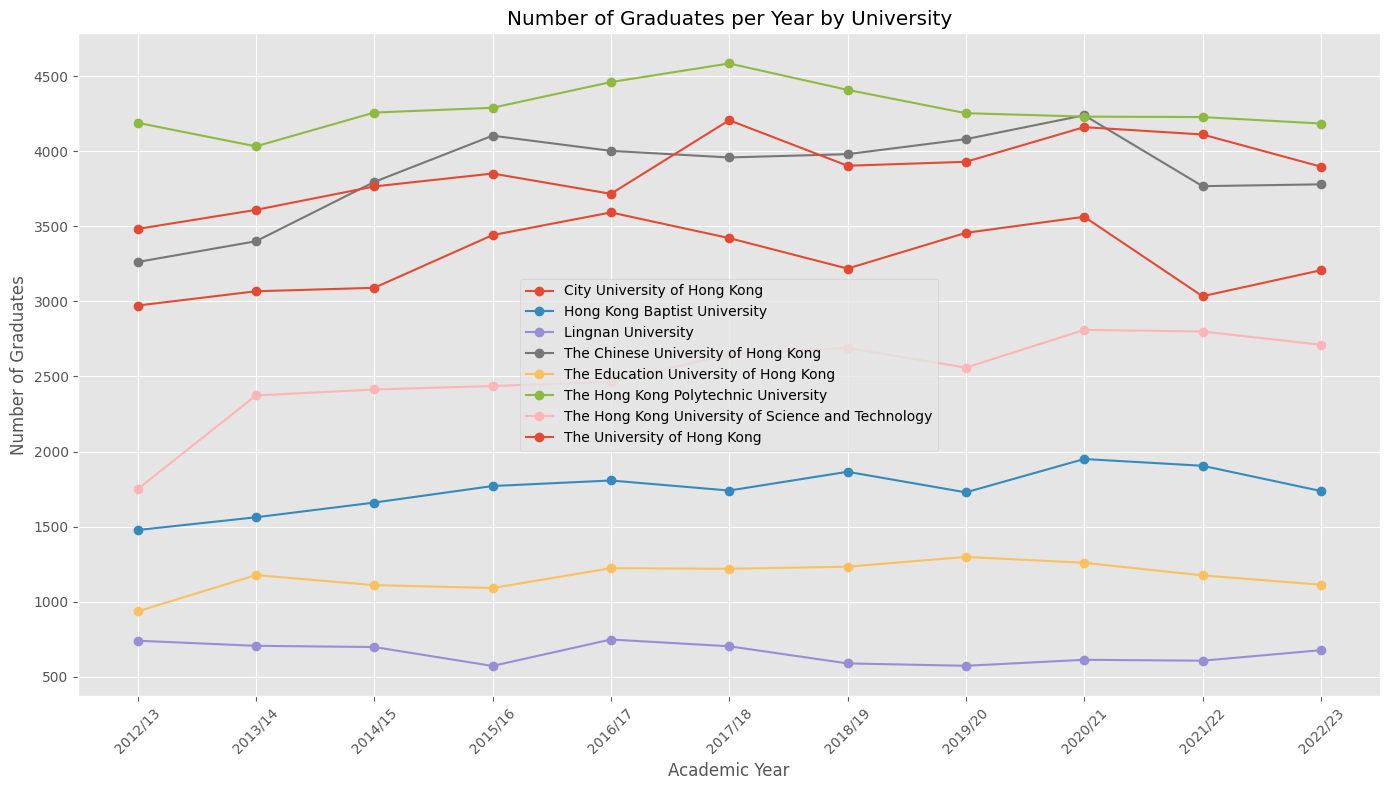

In [ ]:
# Group and calculate the number of graduates per year for each university
graduates_per_year_university = df.groupby(['Academic Year', 'University'])['Number of Graduates (Headcount)'].sum().reset_index()

# Create a plot
plt.figure(figsize=(14, 8))

# Create a line plot for each university
for university in graduates_per_year_university['University'].unique():
    uni_data = graduates_per_year_university[graduates_per_year_university['University'] == university]
    plt.plot(uni_data['Academic Year'], uni_data['Number of Graduates (Headcount)'], marker='o', label=university)

# Set the chart title and labels
plt.title('Number of Graduates per Year by University')
plt.xlabel('Academic Year')
plt.ylabel('Number of Graduates')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Display the chart
plt.show()

## 2. The proportion of full-time employment among graduates from each university per year

<ipython-input-162-74fc730f7f45>:29: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  plt.tight_layout()
<ipython-input-162-74fc730f7f45>:29: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


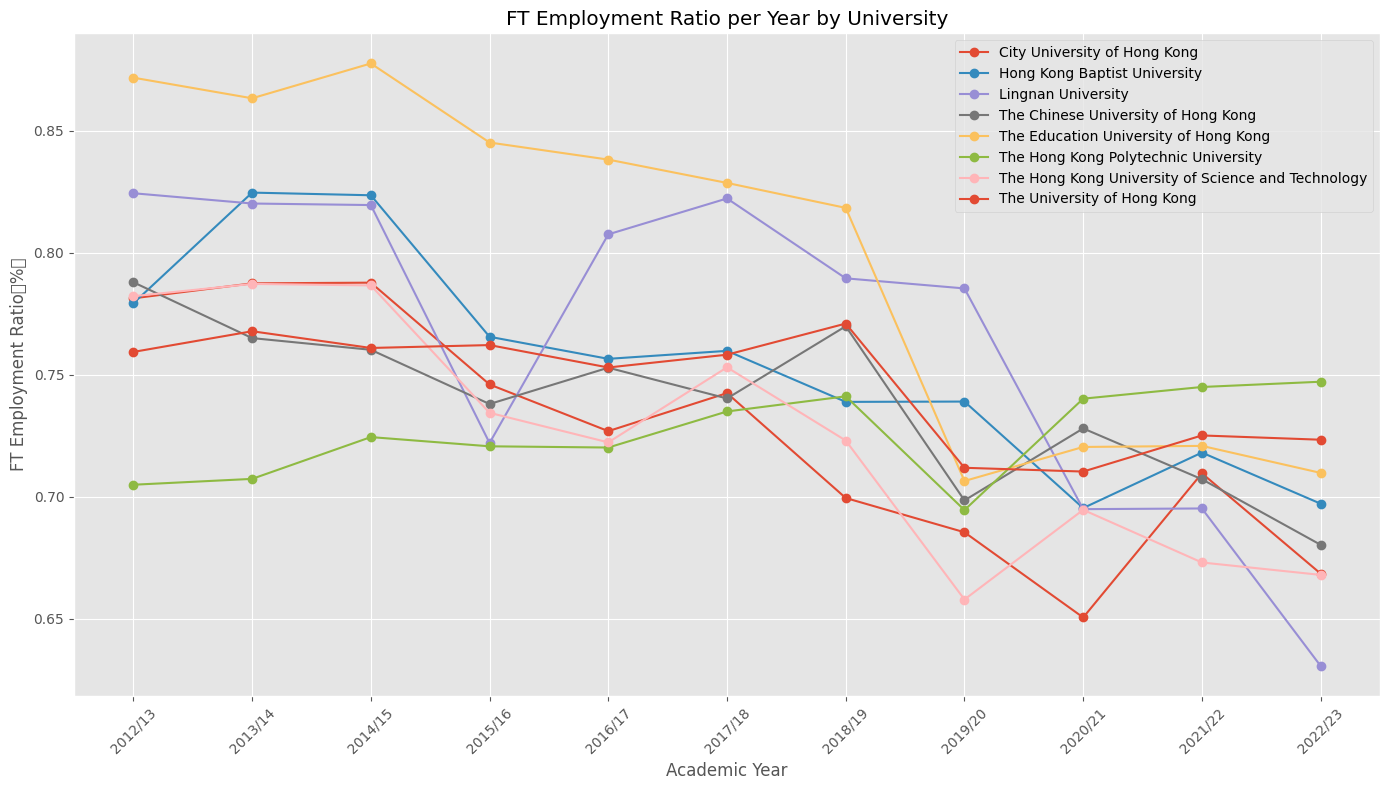

In [ ]:
# 1. Filter full-time employment data
ft_employment_data = df[df['Employment Situation'] == 'FT employment']

# 2. Calculate the number of full-time employed graduates per year for each university
ft_employment_per_year = ft_employment_data.groupby(['Academic Year', 'University'])['Number of Graduates (Headcount)'].sum().reset_index()
ft_employment_per_year.rename(columns={'Number of Graduates (Headcount)': 'FT Employment'}, inplace=True)

# 3. Calculate the total number of graduates per year for each university
total_graduates_per_year = df.groupby(['Academic Year', 'University'])['Number of Graduates (Headcount)'].sum().reset_index()
total_graduates_per_year.rename(columns={'Number of Graduates (Headcount)': 'Total Graduates'}, inplace=True)

# 4. Merge the two datasets and calculate the ratio
employment_ratio = pd.merge(ft_employment_per_year, total_graduates_per_year, on=['Academic Year', 'University'])
employment_ratio['FT Employment Ratio'] = employment_ratio['FT Employment'] / employment_ratio['Total Graduates']

# 5. Plot the FT employment ratio per year for each university
plt.figure(figsize=(14, 8))

for university in employment_ratio['University'].unique():
    uni_data = employment_ratio[employment_ratio['University'] == university]
    plt.plot(uni_data['Academic Year'], uni_data['FT Employment Ratio'], marker='o', label=university)

# Set the chart title and labels
plt.title('FT Employment Ratio per Year by University')
plt.xlabel('Academic Year')
plt.ylabel('FT Employment Ratio')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Display the chart
plt.show()

## 3. The chart of educational qualification distribution among graduates from each university over the past decade

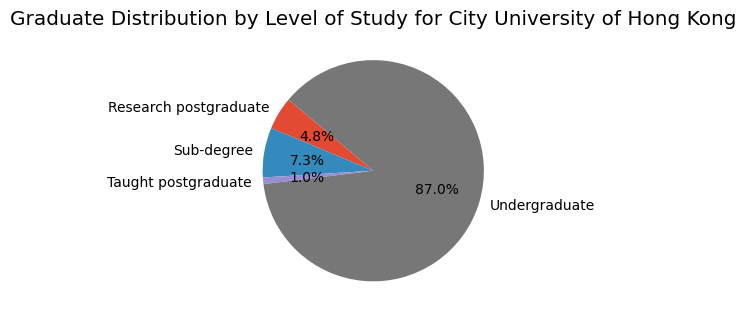

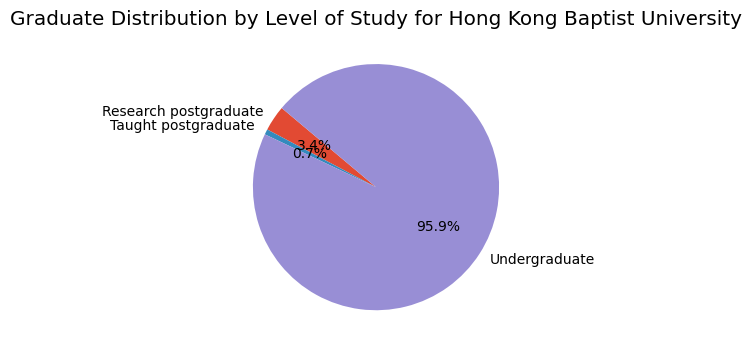

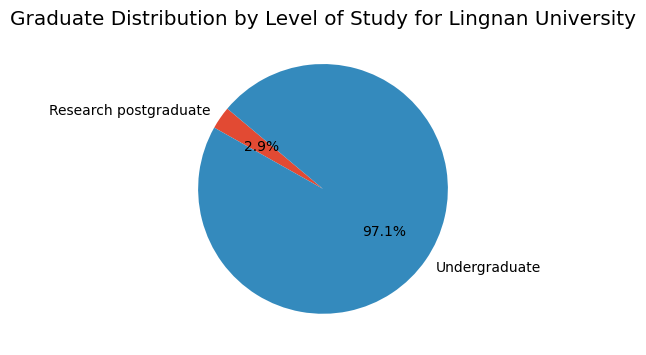

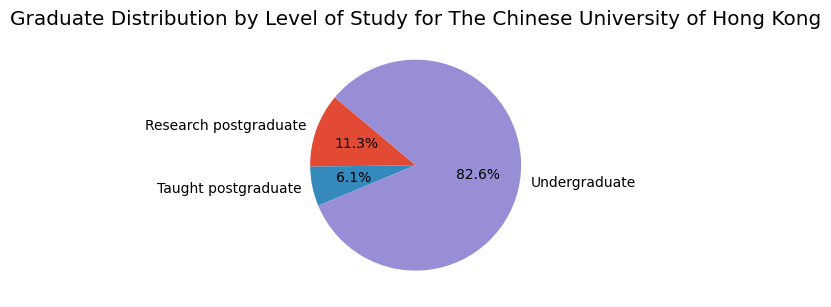

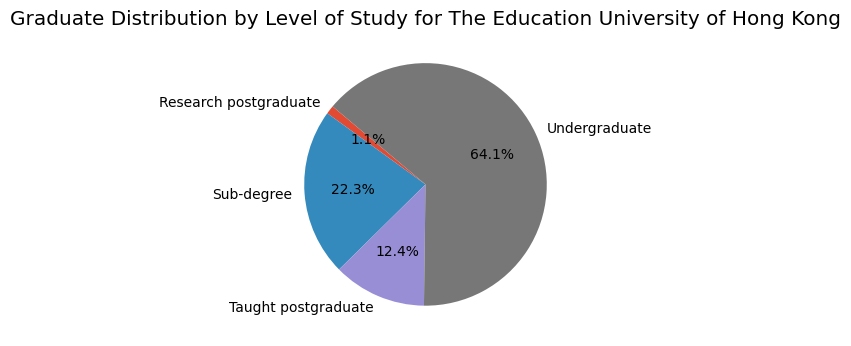

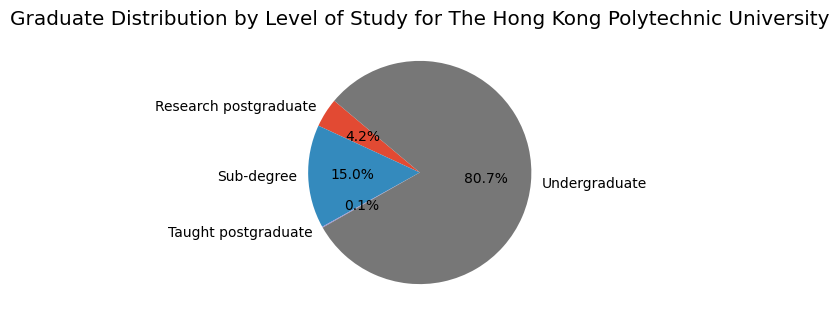

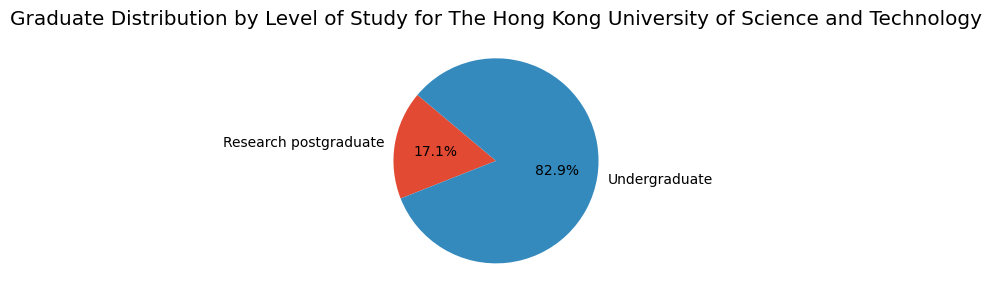

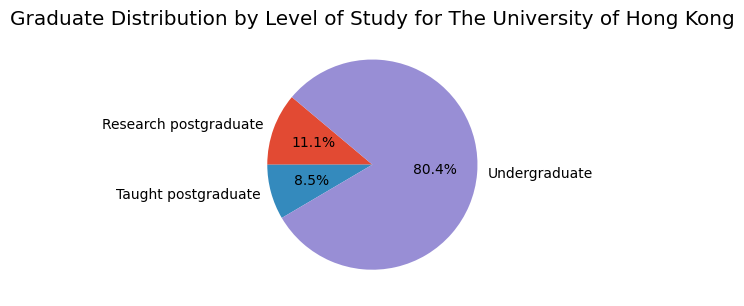

In [ ]:
# Get the list of unique universities
universities = df['University'].unique()

# Create a pie chart for each university
for university in universities:
    # Filter data for the current university
    uni_data = df[df['University'] == university]

    # Group by level of study and calculate the number of graduates
    level_counts = uni_data.groupby('Level of study')['Number of Graduates (Headcount)'].sum()

    # Create a pie chart
    plt.figure(figsize=(5, 5))
    plt.pie(level_counts, labels=level_counts.index, autopct='%1.1f%%', startangle=140)

    # Set the chart title
    plt.title(f'Graduate Distribution by Level of Study for {university}')

    # Display the chart
    plt.tight_layout()
    plt.show()

##  4. Comparing employment situations among different universities

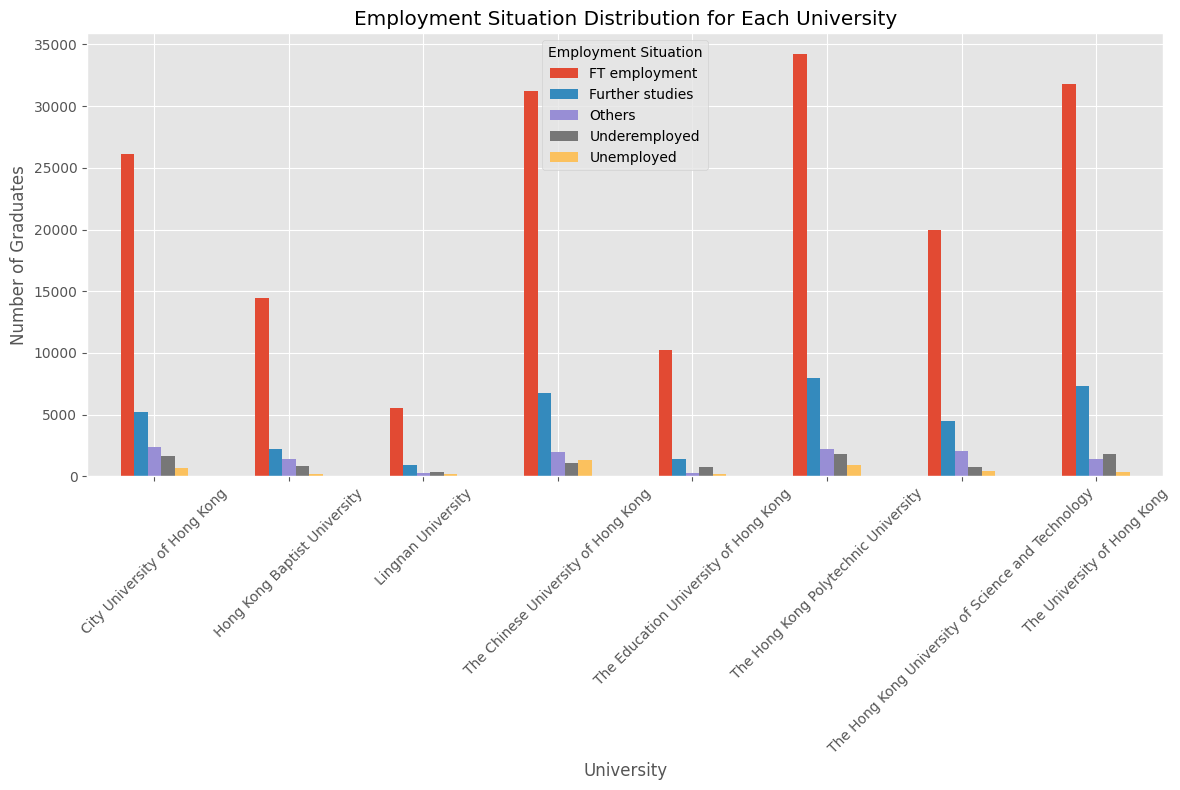

In [ ]:
# Compare employment situations among different universities
employment_distribution = df.groupby(['University', 'Employment Situation'])['Number of Graduates (Headcount)'].sum().unstack()

# Create a bar chart for employment situations between universities
employment_distribution.plot(kind='bar', figsize=(12, 8))

# Set the chart title and labels
plt.title('Employment Situation Distribution for Each University')
plt.xlabel('University')
plt.ylabel('Number of Graduates')
plt.xticks(rotation=45)
plt.legend(title='Employment Situation')
plt.tight_layout()
plt.show()

## 5. Career choices among graduates from different universities

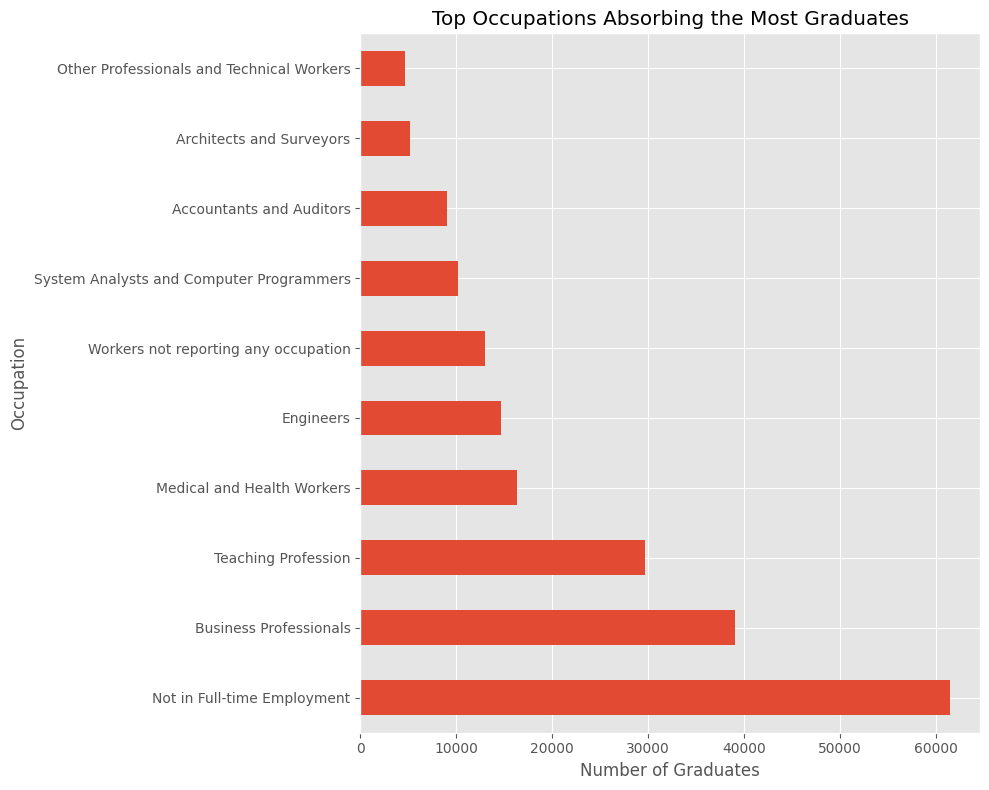

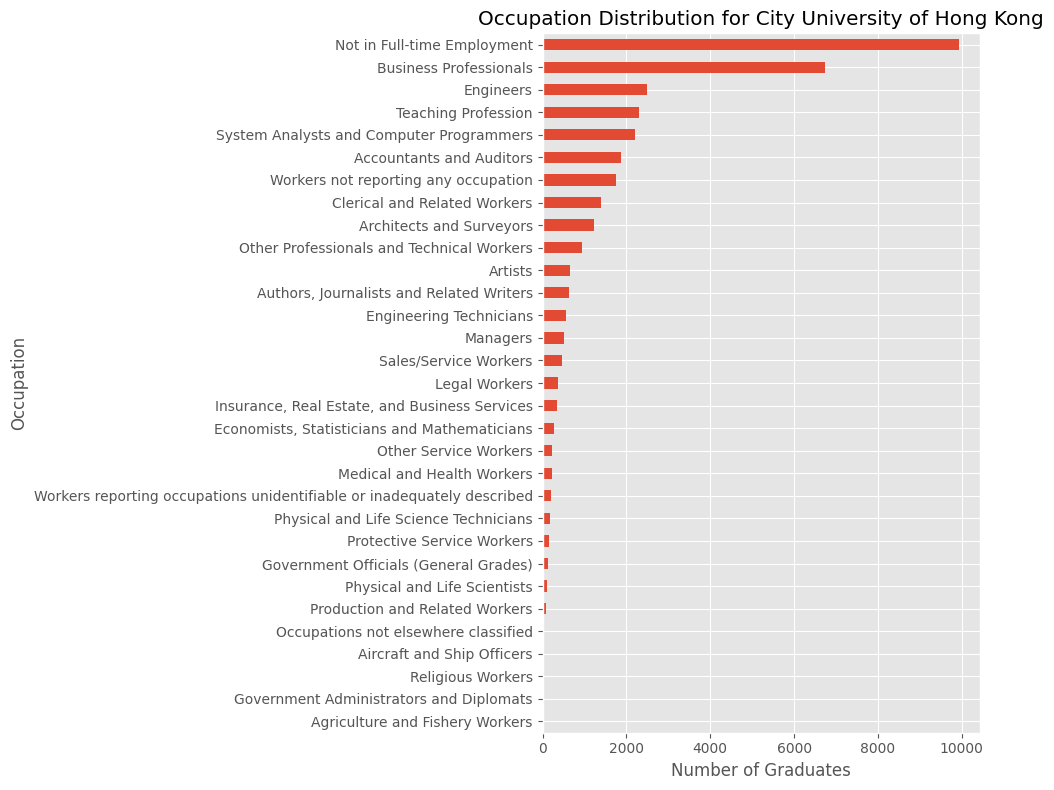

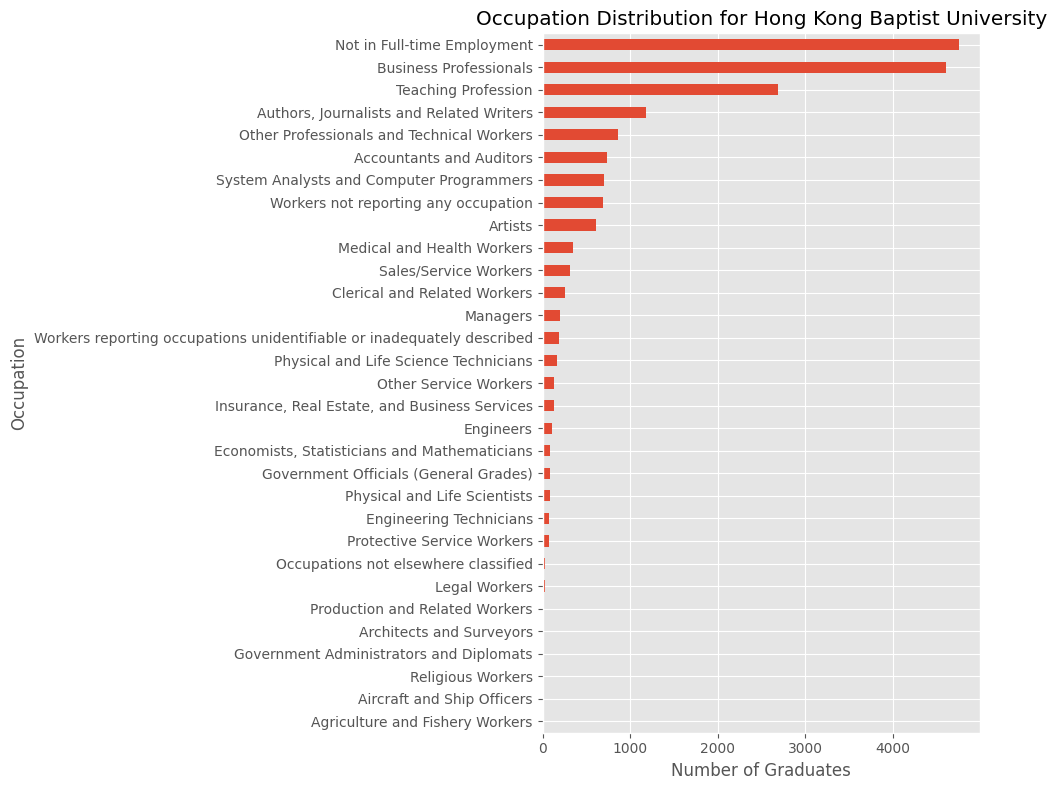

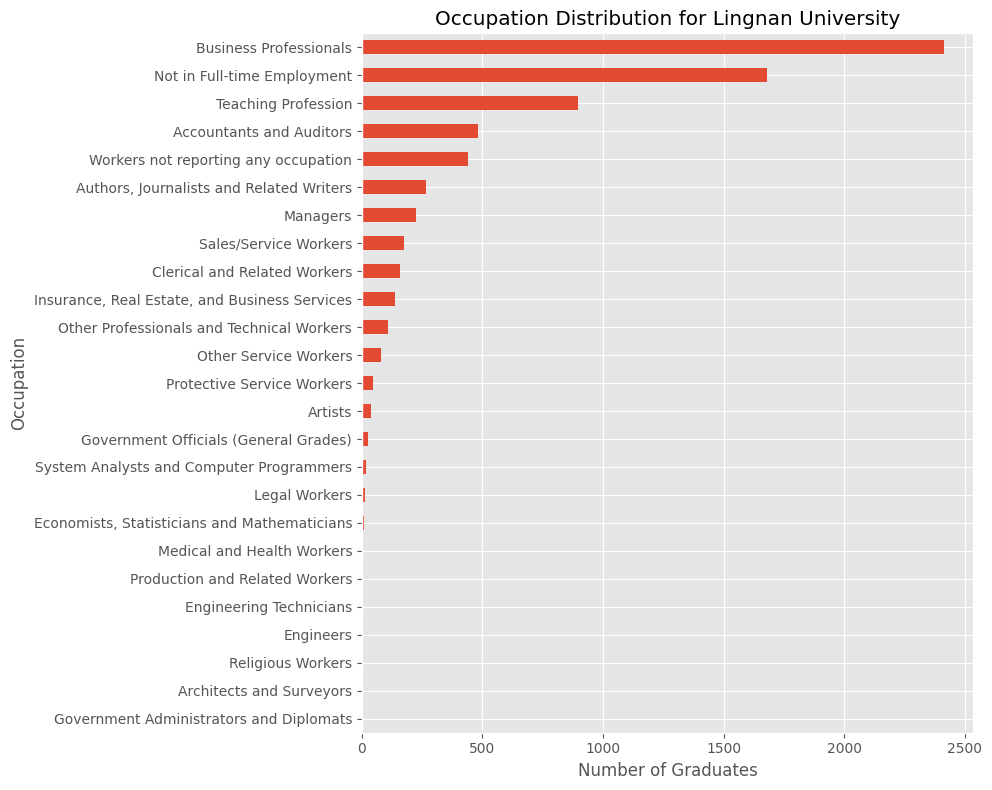

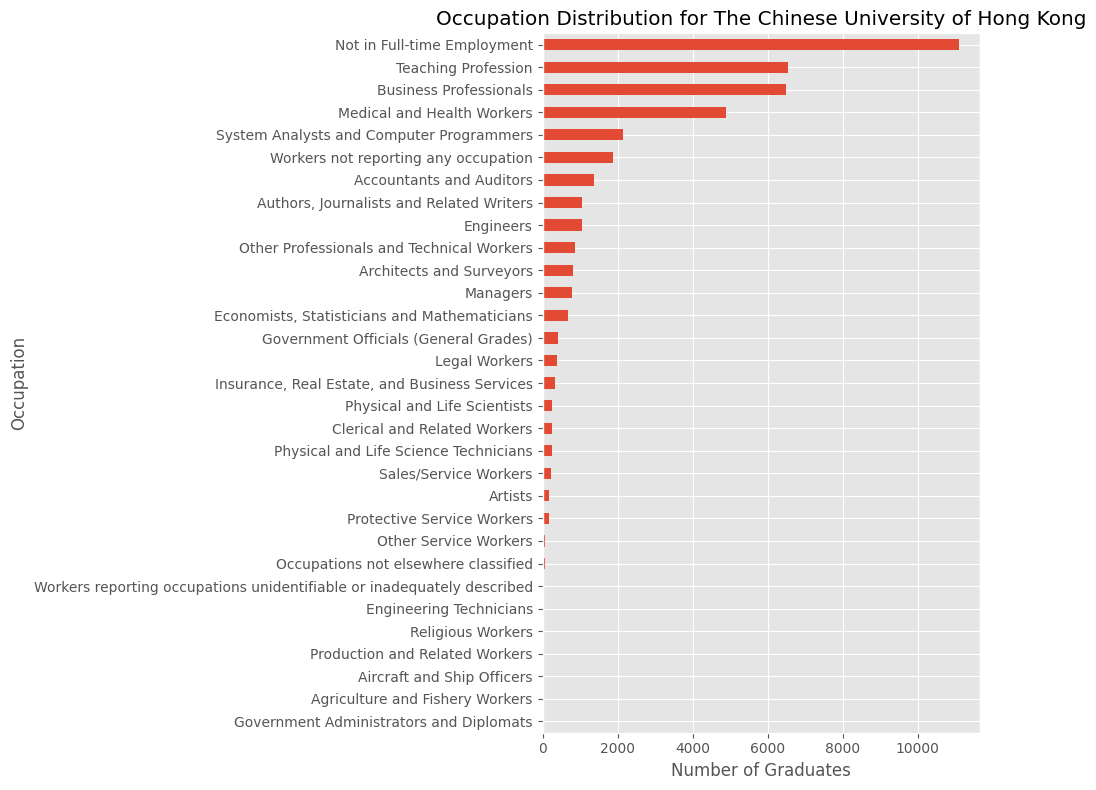

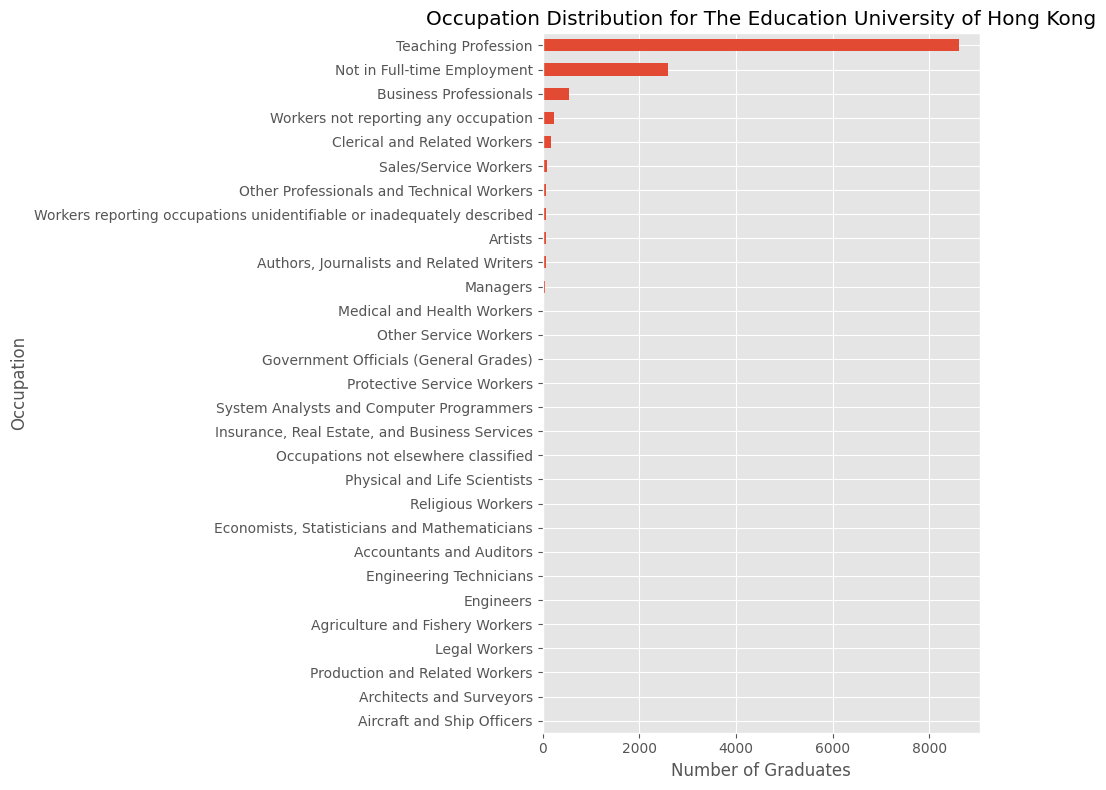

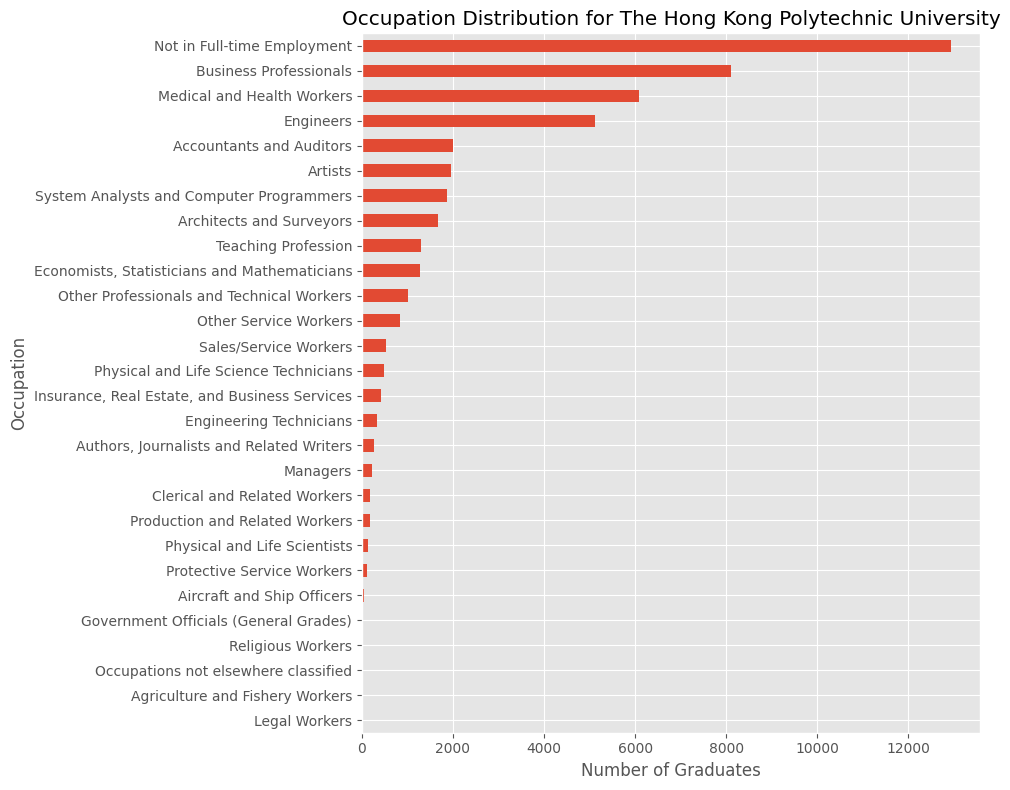

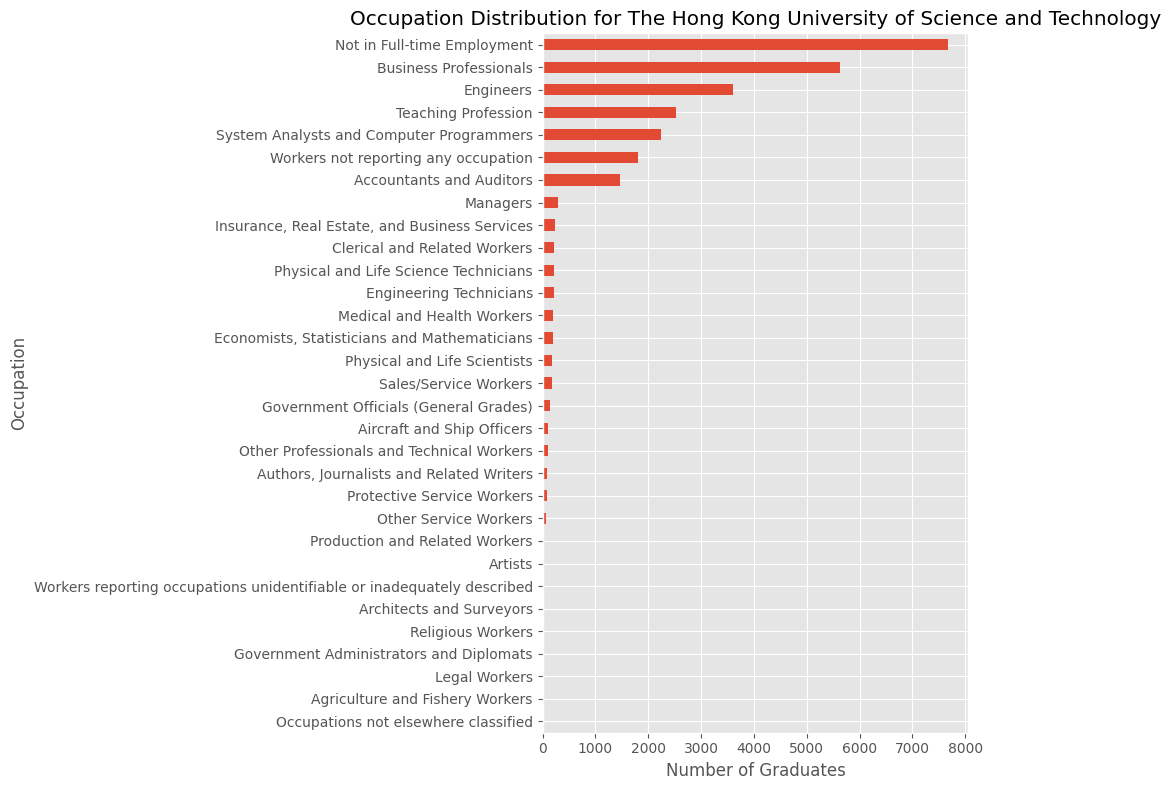

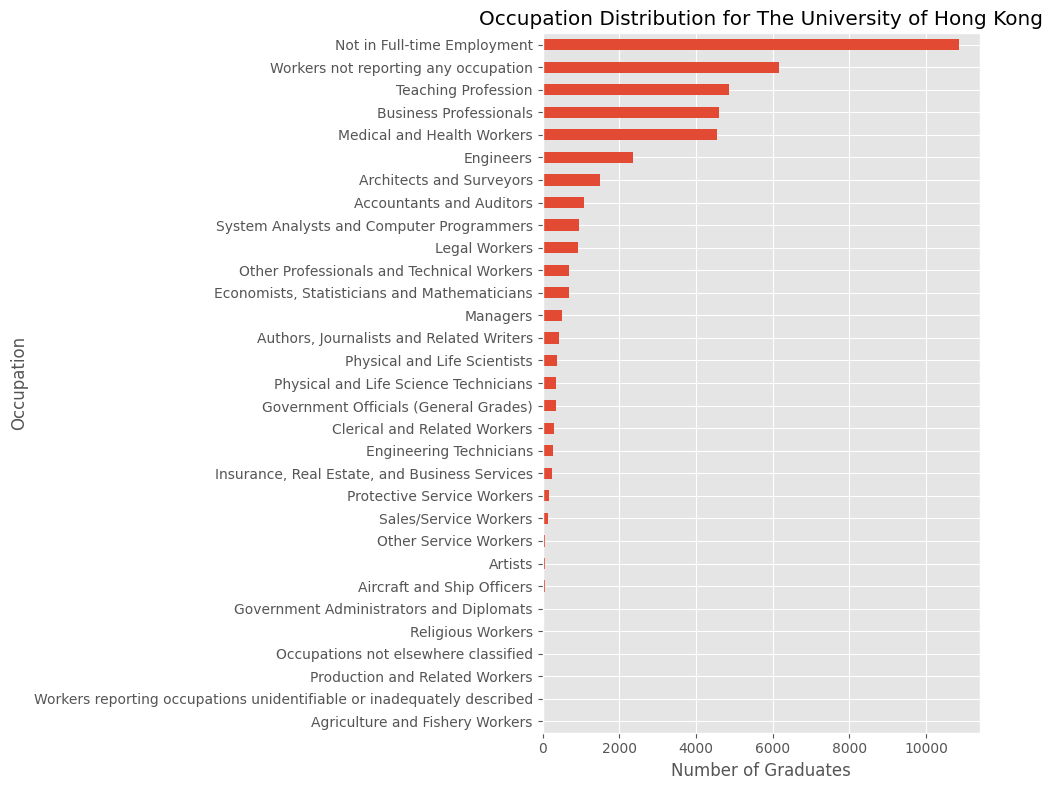

In [ ]:
# Determine the occupation fields that absorb the most graduates
total_occupation_counts = df.groupby('Occupation')['Number of Graduates (Headcount)'].sum().sort_values(ascending=False)

# Create a bar chart for the top occupation fields that absorb the most graduates
plt.figure(figsize=(10, 8))
total_occupation_counts.head(10).plot(kind='barh')
plt.title('Top Occupations Absorbing the Most Graduates')
plt.xlabel('Number of Graduates')
plt.ylabel('Occupation')
plt.tight_layout()
plt.show()

# Analyze the differences in career choices among graduates from different universities
universities = df['University'].unique()

# Create a bar chart for the occupation distribution for each university
for university in universities:
    uni_data = df[df['University'] == university]
    occupation_counts = uni_data.groupby('Occupation')['Number of Graduates (Headcount)'].sum().sort_values()

    plt.figure(figsize=(10, 8))
    occupation_counts.plot(kind='barh')
    plt.title(f'Occupation Distribution for {university}')
    plt.xlabel('Number of Graduates')
    plt.ylabel('Occupation')
    plt.tight_layout()
    plt.show()

## 6. The proportion of different universities in a specific industry

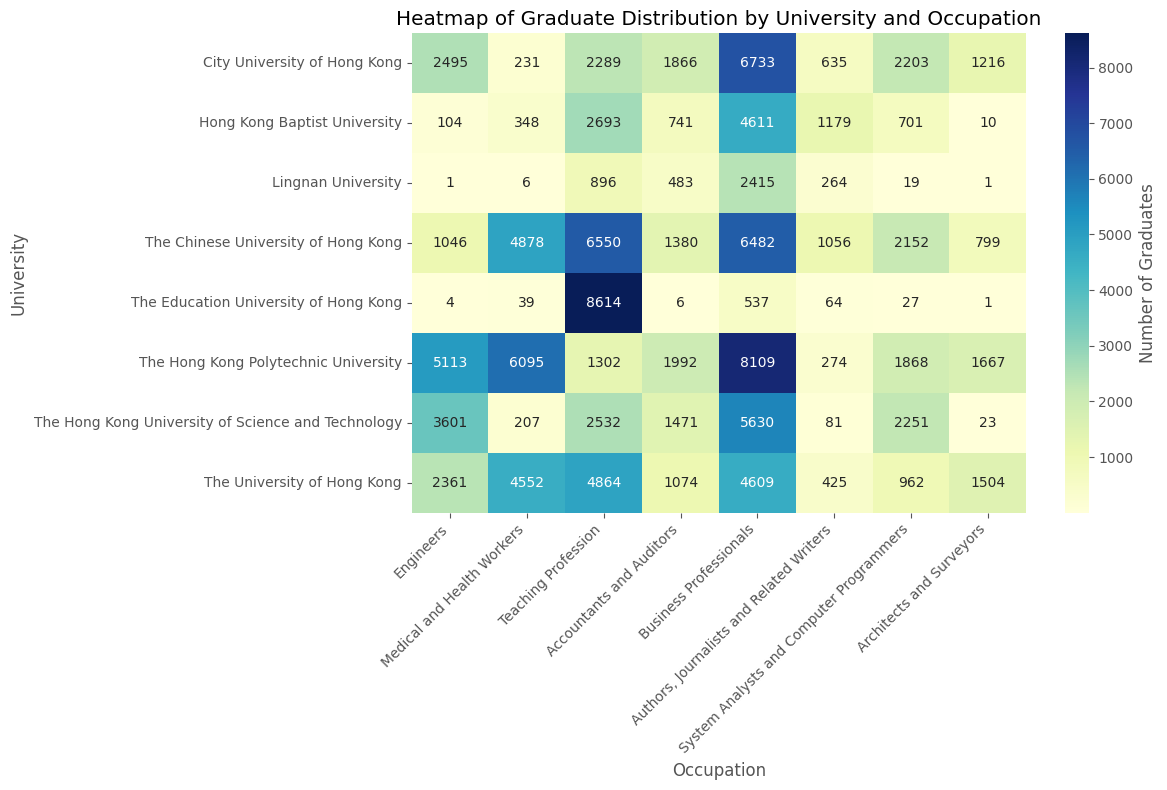

In [ ]:
# Choice specific industries
industries = [
    "Engineers",
    "Medical and Health Workers",
    "Teaching Profession",
    "Accountants and Auditors",
    "Business Professionals",
    "Authors, Journalists and Related Writers",
    "System Analysts and Computer Programmers",
    'Architects and Surveyors'
]

# Create a pivot table for industries and universities
pivot_table = df.pivot_table(
    values='Number of Graduates (Headcount)',
    index='University',
    columns='Occupation',
    aggfunc='sum',
    fill_value=0
)

# Filter columns to include only the industries of interest
filtered_table = pivot_table[industries]

# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_table, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Number of Graduates'})
plt.title('Heatmap of Graduate Distribution by University and Occupation')
plt.ylabel('University')
plt.xlabel('Occupation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()